In [40]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import SaltRemover
from rdkit.Chem.Draw import IPythonConsole
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import molvs

from scipy.spatial import distance
from sklearn import manifold
import seaborn
import pandas as pd

In [3]:
isOrganic = Chem.MolFromSmarts("[#6]")
hasInorganic = Chem.MolFromSmarts("[!#6;!#7;!#8;!#16;!Cl;!F;!Br;!I]")

In [29]:
mol = Chem.MolFromSmiles("[Na+].O=C(C)Oc1ccccc1C([O-])=O")
print(mol.HasSubstructMatch(isOrganic))
print(mol.HasSubstructMatch(hasInorganic))

True
True


In [30]:
SaltRemover.SaltRemover

rdkit.Chem.SaltRemover.SaltRemover

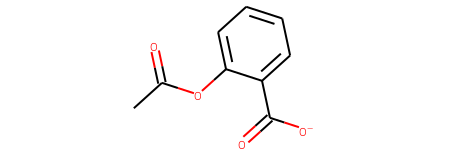

In [31]:
remover = SaltRemover.SaltRemover()
remover.StripMol(mol)

In [34]:
def _InitialiseNeutralisationReactions():
    patts= (
        # Imidazoles
        ('[n+;H]','n'),
        # Amines
        ('[N+;!H0]','N'),
        # Carboxylic acids and alcohols
        ('[$([O-]);!$([O-][#7])]','O'),
        # Thiols
        ('[S-;X1]','S'),
        # Sulfonamides
        ('[$([N-;X2]S(=O)=O)]','N'),
        # Enamines
        ('[$([N-;X2][C,N]=C)]','N'),
        # Tetrazoles
        ('[n-]','[nH]'),
        # Sulfoxides
        ('[$([S-]=O)]','S'),
        # Amides
        ('[$([N-]C=O)]','N'),
        )
    return [(Chem.MolFromSmarts(x),Chem.MolFromSmiles(y,False)) for x,y in patts]

_reactions=None
def NeutraliseCharges(mol, reactions=None):
    global _reactions
    if reactions is None:
        if _reactions is None:
            _reactions=_InitialiseNeutralisationReactions()
        reactions=_reactions
    replaced = False
    for i,(reactant, product) in enumerate(reactions):
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = Chem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return mol
    else:
        return False

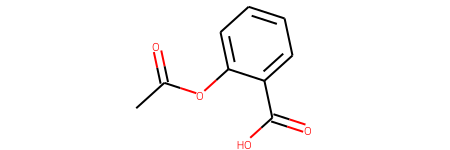

In [35]:
NeutraliseCharges(remover.StripMol(mol))

In [36]:
NeutraliseCharges(NeutraliseCharges(remover.StripMol(mol)))

False

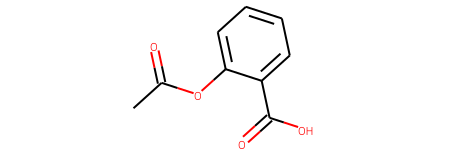

In [45]:
s = molvs.Standardizer()
s.super_parent(mol)

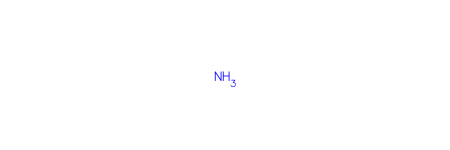

In [46]:
s.super_parent(Chem.MolFromSmiles("[NH3+]-[Pt-2](Cl)(Cl)[NH3+]"))

In [21]:
isOrganic = Chem.MolFromSmarts("[#6]")
hasInorganic = Chem.MolFromSmarts("[!#6;!#7;!#8;!#16;!Cl;!F;!Br;!I]")
_s = molvs.Standardizer()
def standardization(mol):
    mol = _s.standardize(mol)
    mol = _s.fragment_parent(mol)
    if mol.HasSubstructMatch(isOrganic) and not mol.HasSubstructMatch(hasInorganic):
        mol = _s.charge_parent(mol)
        mol = _s.stereo_parent(mol)
        return mol
    else:
        return None

In [3]:
standardization(Chem.MolFromSmiles("[NH3+]-[Pt-2](Cl)(Cl)[NH3+]"))

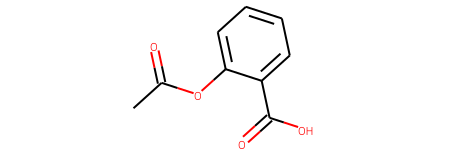

In [4]:
standardization(Chem.MolFromSmiles("[Na+].O=C(C)Oc1ccccc1C([O-])=O"))

In [22]:
drugbank = [mol for mol in Chem.SDMolSupplier('../data/drugbank.sdf') if mol]
supp = (standardization(mol) for mol in drugbank if mol)
clean_drugbank = [mol for mol in supp if mol]

RDKit ERROR: [14:18:31] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:18:31] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [14:18:31] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:18:31] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [14:18:31] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:18:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:18:31] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [14:18:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:18:31] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:18:31] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [14:18:31] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:18:31] Can't kek

RDKit ERROR: [14:18:32] ERROR: Explicit valence for atom # 53 N, 4, is greater than permitted
RDKit ERROR: [14:18:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [14:18:32] ERROR: Could not sanitize molecule ending on line 480504
RDKit ERROR: [14:18:32] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [14:18:32] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:18:32] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [14:18:32] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:18:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [14:18:32] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [14:18:32] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [14:18:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
R

RDKit ERROR: [14:18:33] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [14:19:40] Can't kekulize mol.  Unkekulized atoms: 3 10
RDKit ERROR: 
RDKit ERROR: [14:19:40] Can't kekulize mol.  Unkekulized atoms: 3 10
RDKit ERROR: 
RDKit ERROR: [14:19:40] Can't kekulize mol.  Unkekulized atoms: 3 10
RDKit ERROR: 
RDKit ERROR: [14:19:40] Can't kekulize mol.  Unkekulized atoms: 3 10
RDKit ERROR: 
RDKit ERROR: [14:19:40] Can't kekulize mol.  Unkekulized atoms: 3 10
RDKit ERROR: 


In [24]:
len(clean_drugbank), len(drugbank)

(6210, 7113)

In [26]:
fps = [Chem.GetMorganFingerprintAsBitVect(m,2,nBits=1024) for m in clean_drugbank]

sparse_mat = distance.pdist(fps,metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)

In [34]:
data=pd.DataFrame(X_mds, columns=["x","y"])

In [46]:
def distance_function(i,j):
    return dist_mat[i,j]

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(fps), 20, seed=666))
t_data = data.copy()
t_data["picked"] = [x in picked for x,y in enumerate(X_mds)]

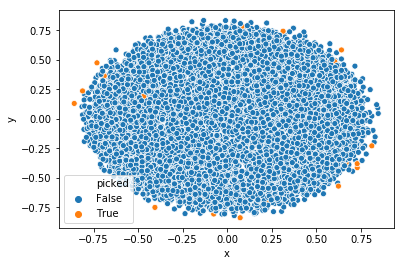

In [49]:
seaborn.scatterplot(x="x",y="y",data=t_data, hue="picked")

In [45]:
t_data

,x,y
0,0.307570,0.279798
1,-0.218081,-0.512412
2,0.168832,0.489181
3,0.438529,-0.210471
4,-0.641086,-0.317310
5,-0.398005,-0.325131
6,0.155907,0.445424
7,0.145205,0.298689
8,-0.402292,0.081655
9,-0.440692,0.211929
